In [29]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pendulum
#import QLearningParameters as qparams


In [30]:
#Function to return current cost
def get_cost(x,u):
    cost = (x[0]-np.pi)**2 + 0.01*(x[1]**2)+0.0001*(u**2)
    return cost

In [31]:
# we don't want 2pi to be in the set because it's the same as 0
# we generate 50 equally spaced points for theta
discretized_theta = np.linspace(0, 2*np.pi, 50, endpoint=False)

# we generate 50 equally spaced points for omega
discretized_omega = np.linspace(-6, 6, 50)

# Controls = [-5,0,5]

In [32]:
#Global parameters
controls = np.array([-5,0,5])
learning_progress = []

In [33]:
def get_policy_and_value_function(q_table):
    # Function to compute the optimal policy and optimal value function from a q table.
    
    optimal_value_function = np.zeros([50,50])
    optimal_policy = np.zeros([50,50])
    
    for i in range(50):
        for j in range(50):
            
            opt_index = np.argmin(q_table[i,j,:]) #Find the least Q value
            optimal_value_function[i,j] = q_table[i,j,opt_index]
            optimal_policy[i,j] = controls[opt_index] #indexes
            
    return optimal_policy, optimal_value_function

In [34]:
# Function to find index of closest value
def find_nearest_value_index(array, value):
    index = np.argmin(np.abs(array - value))
    return index

In [35]:
def q_learning(q_table):
    # Function that implements tabular Q-learning algorithm
    
    # Define Q-learning parameters
    epsilon = 0.1                  #epsilon greedy probability
    N = 100                        #length of each episode
    alpha = 0.99                   # Parameter from cost function
    
    step_size = pendulum.DELTA_T        #Learning rate (gamma) 
    
    num_episodes = 0  
    
    learning_progress.clear()
    
    while(num_episodes<6000):
        
        x = np.transpose(np.array([0.,0.]))
        
        num_episodes = num_episodes+1
        
        episode_cost = 0
        
        #optimal_policy, optimal_value = get_policy_and_value_function(q_table)
        
        for i in range(N):
                        
            theta_index = find_nearest_value_index(discretized_theta,x[0])
            omega_index = find_nearest_value_index(discretized_omega,x[1])
            
            #Choose action according to epsilon greedy policy
            index = np.argmin(q_table[theta_index, omega_index,:])
            u_optimal = controls[index]
            
            u_rand = int(np.random.choice(controls,1))
    
            u_chosen = int(np.random.choice([u_optimal,u_rand],1,p=[1-epsilon,epsilon]))
            u_chosen_index = np.where(controls == u_chosen)
            
            # Compute next state
            x_next = pendulum.get_next_state(x,u_chosen)
            theta_index_next = find_nearest_value_index(discretized_theta,x_next[0])
            omega_index_next = find_nearest_value_index(discretized_omega,x_next[1])
            
            # Compute current cost and optimal cost
            cost = get_cost(x,u_chosen)
            cost_optimal = get_cost(x,u_optimal)
            
            #Optimal value from next step
            Q_next = np.amin(q_table[theta_index_next, omega_index_next, :])
            
            # Current Q value
            Q_current = q_table[theta_index, omega_index, u_chosen_index]
            
            # Temporal difference error
            error = cost + alpha*Q_next - Q_current
            
            #Track episode cost
            episode_cost = episode_cost + cost_optimal
            
            #Update step
            q_table[theta_index, omega_index, u_chosen_index] = Q_current + step_size*error
            
            x = x_next
            
        learning_progress.append(episode_cost)

    print('Number of Episodes = ', num_episodes)    
    
    return q_table

In [36]:
Q_Table = np.zeros([50,50,3]) #Initialize Q table
Q_Table_out = q_learning(Q_Table) #Learn Q Table
invert_policy, invert_value_function = get_policy_and_value_function(Q_Table_out)


Number of Episodes =  6000


# Learning Progress

<IPython.core.display.Javascript object>


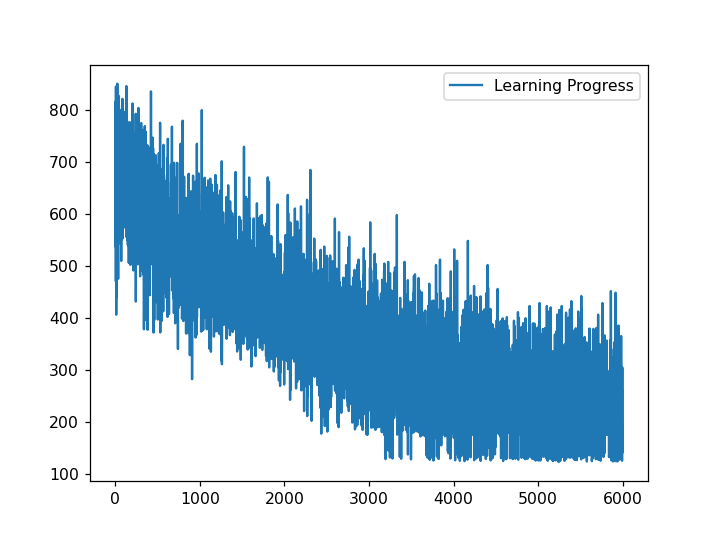

In [37]:
# Plot learning progress
plt.figure()
plt.plot(learning_progress)
#print(learning_progress)
plt.legend(['Learning Progress'])

In [38]:
def invert_controller(x):
    theta_index = find_nearest_value_index(discretized_theta,x[0])
    omega_index = find_nearest_value_index(discretized_omega,x[1])
    
    u_optimal = invert_policy[theta_index, omega_index]
    
    return(u_optimal)

In [39]:
T = 10.
x0 = np.transpose(np.array([0,0]))
t, x, u = pendulum.simulate(x0, invert_controller, T)

<IPython.core.display.Javascript object>


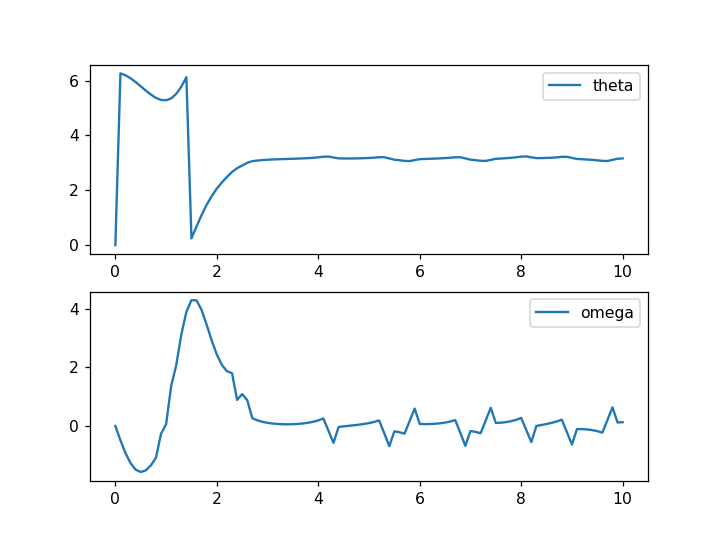

<IPython.core.display.Javascript object>


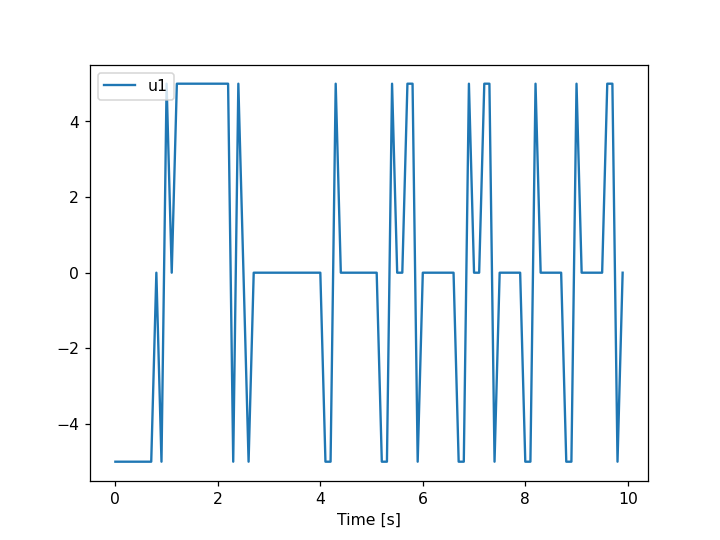

Text(0.5, 0, 'Time [s]')

In [40]:
# Plots

plt.figure()

plt.subplot(2,1,1)
plt.plot(t, x[0,:])
plt.legend(['theta'])

plt.subplot(2,1,2)
plt.plot(t, x[1,:])
plt.legend(['omega'])

# we can also plot the control
plt.figure()
plt.plot(t[:-1], u.T)
plt.legend(['u1'])
plt.xlabel('Time [s]')

# Animation


In [41]:
pendulum.animate_robot(x)

<source type="video/mp4" src="data:video/mp4;base64,AAAAIGZ0eXBNNFYgAAACAE00ViBpc29taXNvMmF2YzEAAAAIZnJlZQAAhJRtZGF0AAACoQYF//+d
3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE2MSAtIEguMjY0L01QRUctNCBBVkMgY29kZWMg
LSBDb3B5bGVmdCAyMDAzLTIwMjAgLSBodHRwOi8vd3d3LnZpZGVvbGFuLm9yZy94MjY0Lmh0bWwg
LSBvcHRpb25zOiBjYWJhYz0xIHJlZj0zIGRlYmxvY2s9MTowOjAgYW5hbHlzZT0weDM6MHgxMTMg
bWU9aGV4IHN1Ym1lPTcgcHN5PTEgcHN5X3JkPTEuMDA6MC4wMCBtaXhlZF9yZWY9MSBtZV9yYW5n
ZT0xNiBjaHJvbWFfbWU9MSB0cmVsbGlzPTEgOHg4ZGN0PTEgY3FtPTAgZGVhZHpvbmU9MjEsMTEg
ZmFzdF9wc2tpcD0xIGNocm9tYV9xcF9vZmZzZXQ9LTIgdGhyZWFkcz0xMiBsb29rYWhlYWRfdGhy
ZWFkcz0yIHNsaWNlZF90aHJlYWRzPTAgbnI9MCBkZWNpbWF0ZT0xIGludGVybGFjZWQ9MCBibHVy
YXlfY29tcGF0PTAgY29uc3RyYWluZWRfaW50cmE9MCBiZnJhbWVzPTMgYl9weXJhbWlkPTIgYl9h
ZGFwdD0xIGJfYmlhcz0wIGRpcmVjdD0xIHdlaWdodGI9MSBvcGVuX2dvcD0wIHdlaWdodHA9MiBr
ZXlpbnQ9MjUwIGtleWludF9taW49MTAgc2NlbmVjdXQ9NDAgaW50cmFfcmVmcmVzaD0wIHJjX2xv
b2thaGVhZD00MCByYz1jcmYgbWJ0cmVlPTEgY3JmPTIzLjAgcWNvbXA9MC42MCBxcG1pbj0wIHFw
bWF4PTY5IHFwc3RlcD00IGlwX3JhdGlvPTEuNDAgYXE9MToxLjAwAIAAAA0hZYiEAD///vdonwKb
WkN6gOSVxSXbT4H/q2dwfI/pAwAAAwAAAwAAFbekZYZCdC/yYgAABXwAsgZkmelxSROADzDHsnTd
NPwqh0IYXPcgsx/VdOgPtpJk3xmz25oQD2NxIJATjjPFHtCPYSSyrz7P5apm+qGoCaO0hQa9Tgbl
AkEBRtsbJoJjDfyhjQSKoxTNex2bKxAqRTNoM297EWxml92F4SgqAa9lbwbZ8+3M8l0TfdHNaygc
Buoe/stRvUXLZinWJDX2fTyHC+vsg7SSDh9VCALo/f8LntmbRMOk0qgXCi/HjrLAaDHF+z18yVLK
2z74iGw43VhNdJn7sOk6H3E21bAuxha9GcFT2B/gDsnAFBY5gBiZPeVxVbYpe4QYu/Qkmk29MQ1r
mTd5w6tt8rxwNyDWYzoDXLAPOxYEu0cWoQcXPjpp4iBWBfo93KDgq6XQij4Oj1LGDzySMr38uhgb
YXdV91VBopGTufKSekk2ZkKOtbq4Kr/zM9vviogAubMfy1/YSD/ic+Z6ysW11mqEaw28fkE07LoV
ANnt98/WFOh2kP4qKS2EOW2R/aA3Z7G+ebWAmpyGawSKOP74xuxvFb5q1HlG8DH3O6BFg3INvuHO
b9LHOidxhtyJ3CtFzNDKZ6xn6mDvAAWWi6X5dO/wM3+9oH84RnZyXvVBZTxz37Y9CWBZs8SWxmeL
auVtCDCWXGmfqsrX46rQWMB4u9lYuEPr5AFwsjYv0pOieO9MCs5NlTloAAADADooAa4hxp+PVp8F
+QqD2J0J5/pDiii5fGN0lmY0x71eIwtqvVtzZM5OWEQXCzJMSQ8wkAM9IFkKgzGu8YQ+di+wiiht
8ZvG4dd8uR79qE1FqfAk5pfFUnaB6zO6UwjSBDKTUM1lMmrUFM9OoVjpILfe9bj4zs5p6mmJeWol
yP6TIBPmo5X/Js9OUip6JQW3E4NScYAyThbEq5Rarf85oOVb19ZXzh2rYXL6cu3nf72FKoy75b2D
UFhW11asL0gdfOw9cd6//LzUoKwb7fnrhp38i+jDIjzLbAfCCokp560e6GK1nPaei8uCjS+2cpza
fSxn5kGbz1v/XuktqJrMVcT5kVBmngCbPY24L8GVxTamhMqsAr5TvS57KIt1Th9vnfe4+kJ26dhm
JZDYih2LLVSMR5letYVcJf3KV9b8MO5liOarY40EvGqaa/VbRC4+ZCMlAWhsKhIKKDgNtjPmDrnN
P+osyv1PwjamzyqJBCQwihI0oWAowcnJ3TzdBZXvvbyjiZJ1k1l3WDsK2F1UOpiq/M6nSeFqksSM
CVwLao3wESzP9ltD3lh82n8MHbN13YQmnv8hpHlyl4r6BTHy/GfZL9zfCwTiD4pA/3G66WTZsp4Q
kpfzmstYOGe7eAWn4zPmlHAAYzdLwlUNkvrB1wW8dt/n97Aj60+S8KqJYlzA9LJwI+6i7qBXZhvw
zxr8UhThOvRPe7RR8uEnxHEyC/wkD8WCAgTpfz9Pwsudu4rN4jQae6yO0Ufvv9wcz1s0b3hbomDT
WXt+YOajObgUp4t5TowtCcT20Kgg2yC6tZsQBeUU24dWDtBU5EtlpG8l8lANczuqQ10YsYuDgDnI
ndqMuJZs8cUB3Zd4wU5ePghQwrllwlYReYswoPZxb+KjvRoAjdwdZRqLWR8IJTgUypAUhAPjUWU/
ZX+FFYUvN3dUpvQd/Fm5/bGoCYI6T8jtZbqoPSuNtAcWHYuoO1vi1wXSuD52bI4IljJvUh7Gatl7
+5JLez8l33Z4fhDl/yv+THxrFjh6PtIB6xBhq7pemb3cGtWw32/KpbwOTaeb9SAj81Oq/u0SmfYy
Aw/ULuEn+6qujCeLPlB/GSbQiX3Z/xT3W2blPpHjle99DcmSUgMaFetnHFwP0t5IvKDbFbyLdPtp
tQV3qw/qclvq3wNLj8SAhwJvEArefS6ldrMy1HRXggiJaerkPsKuFIYgu29i2Br9TNaEXrccKYae
jtAe/1qrirXI7a6pwkF5he2sH6ety07yQ1nfrR1LU4gZp45FwoS0XhsREk4Cs2IjMramk29yhlok
rATOPJBwnnFI4dBnnGRA/NecxeofX9rjy58Z/0ixSG5let4enhFxfiyqttccIIvWwk2NwG7b2p1s
2omcakokof90a7dsZ127ejDiyM9dTGQVZaE1zOmlCgNen3kNDDyJQniIMR0y1BwOe++0pCCmQAAz
rm2Kn/+Tm5HVP/8ff9LdwIfQ9dRWD86acYgRjtSyXHiA5F/EopNmDhUFv2qSs2n8SOA3/8Ndoy4i
/vfCaeDwgXe+Qr4VWDYMxTNKyPAcNpYd5mPAQRxRnLLuX7lGaGOk1ab2xdWk08M5GTaBnjnlvE23
Ub7xvJS3KX+G8OjjsgKswHDlCAADHcC3NlKOP4E8am9lVk3Gfo7ImSLpxegvmwqdX8tvrowyK1Db
XxRhYA3QsYBPtTm5Y5rifKcTaPqKCP4Fuj7G9YhB/umZ+w0wtGyLadLmNXe4M03hpVn4nzMN68nX
Ktu5cl23hIf9o2cEUx/JstrI5qycdaW4VFCwCruxgOJWZ4AQcyyUD6FOvjOmKMR/50ER2qu7dHj0
f2lmyI//yKbv7gBDj2oNVjBpOoiqKfdHahddhMdIMX2lx8/Nzc2ttz0dAV/hsJ4rk7rpzKShAbSF
VApNRgMndKH2OydM9DQrbq7u9yVfGx7bAuPPckIEEmIMHVMdrHMQ8Rt6jrnTYIU7ZrBQ5CXDxh2K
9D58oOeEwkVMmD5NEOSef/EjEAM8yQ10S0HnBaf/HYDCn82GlNJePmNKIJJz1nuSueTYmmKxOQzG
s5Vf/xWqZokEvqg+jU8/cO5rM59CeBup0WvQOIcrfcR/1Ga4X+/suNyae5eW6Qbe49Uipg5cXjGG
OXOaQZ7guLRjVjDyNJ7js

# Value Function

<IPython.core.display.Javascript object>


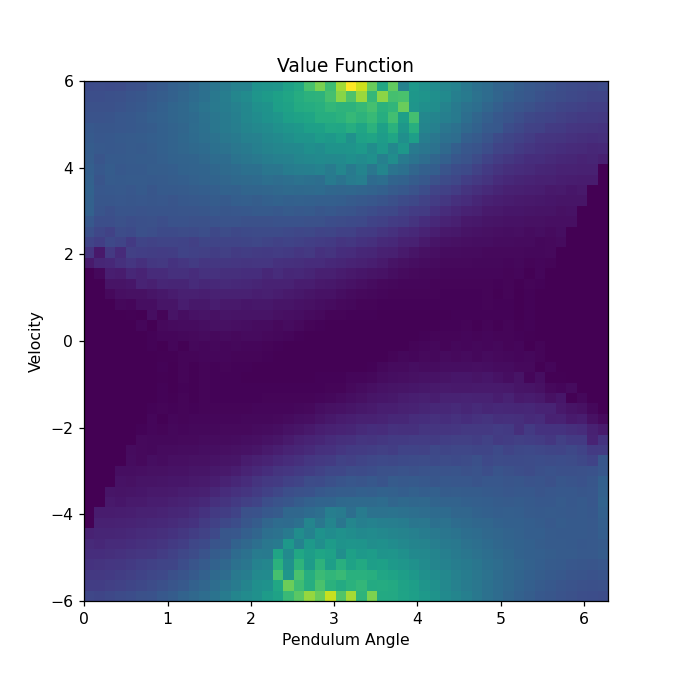

<IPython.core.display.Javascript object>


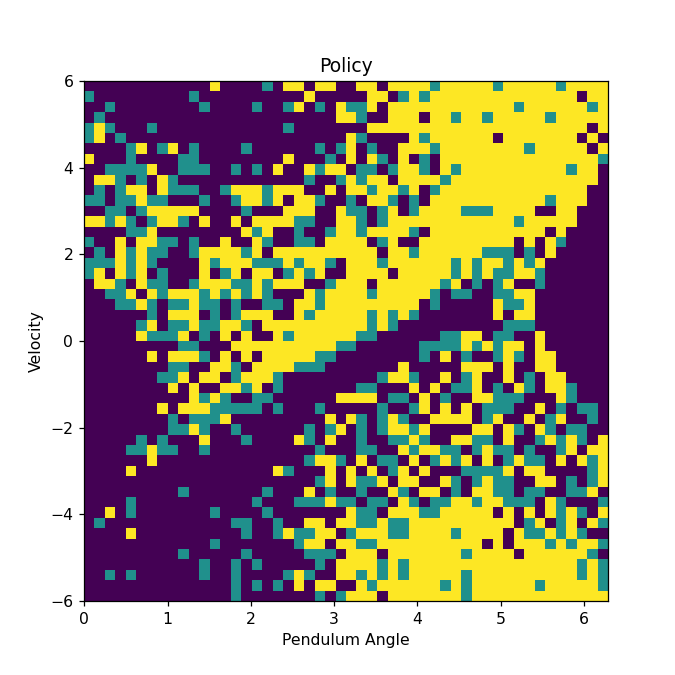

Text(0.5, 1.0, 'Policy')

In [42]:
# we plot the value function
plt.figure(figsize=[6,6])
plt.imshow(invert_value_function, extent=[0., 2*np.pi, -6, 6], aspect='auto')
plt.xlabel('Pendulum Angle')
plt.ylabel('Velocity')
plt.title('Value Function')

# we plot the policy
plt.figure(figsize=[6,6])
plt.imshow(invert_policy, extent=[0., 2*np.pi, -6, 6], aspect='auto')
plt.xlabel('Pendulum Angle')
plt.ylabel('Velocity')
plt.title('Policy')